In [1]:
# import libraries which are used during preproccessing data
#standard libraries which may use in any project
import pandas as pd
import numpy as np 
import sklearn
# imports for figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

###-------------------------
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals
import os # This module provides a portable way of using operating system dependent functionality.

# to make this notebook's output stable across runs
np.random.seed(42)


### Column	Description	Type
###All values were provided at the time of the loan application.
income--------------Income of the user------------------------------int
age	                Age of the user	                                int
experience	        Professional experience of the user in years	int
profession	        Profession	                                    string
married	            Whether married or single	                    string
house_ownership	    Owned or rented or neither	                    string
car_ownership	    Does the person own a car	                    string
risk_flag	        Defaulted on a loan	string,The risk_flag indicates whether there has been a default in the past or not.
currentjobyears	    Years of experience in the current job	        int
currenthouseyears	Number of years in the current residence	    int
city	            City of residence	                            string
state	            State of residence	                            string

In [91]:
#load data
loan_pred=pd.read_csv('loan_prediction_Training Data.csv', thousands=',')
#thousands str, optional
#Thousands separator.

In [4]:
loan_pred.head()

,Id,Income,Age,Experience,Married/Single,House_Ownership,Car_Ownership,Profession,CITY,STATE,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
0,1,1303834,23,3,single,rented,no,Mechanical_engineer,Rewa,Madhya_Pradesh,3,13,0
1,2,7574516,40,10,single,rented,no,Software_Developer,Parbhani,Maharashtra,9,13,0
2,3,3991815,66,4,married,rented,no,Technical_writer,Alappuzha,Kerala,4,10,0
3,4,6256451,41,2,single,rented,yes,Software_Developer,Bhubaneswar,Odisha,2,12,1
4,5,5768871,47,11,single,rented,no,Civil_servant,Tiruchirappalli[10],Tamil_Nadu,3,14,1


In [5]:
loan_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252000 entries, 0 to 251999
Data columns (total 13 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   Id                 252000 non-null  int64 
 1   Income             252000 non-null  int64 
 2   Age                252000 non-null  int64 
 3   Experience         252000 non-null  int64 
 4   Married/Single     252000 non-null  object
 5   House_Ownership    252000 non-null  object
 6   Car_Ownership      252000 non-null  object
 7   Profession         252000 non-null  object
 8   CITY               252000 non-null  object
 9   STATE              252000 non-null  object
 10  CURRENT_JOB_YRS    252000 non-null  int64 
 11  CURRENT_HOUSE_YRS  252000 non-null  int64 
 12  Risk_Flag          252000 non-null  int64 
dtypes: int64(7), object(6)
memory usage: 25.0+ MB


In [32]:
loan_pred.describe()

,Id,Income,Age,Experience,CURRENT_JOB_YRS,CURRENT_HOUSE_YRS,Risk_Flag
count,252000.000000,2.520000e+05,252000.000000,252000.000000,252000.000000,252000.000000,252000.000000
mean,126000.500000,4.997117e+06,49.954071,10.084437,6.333877,11.997794,0.123000
std,72746.278255,2.878311e+06,17.063855,6.002590,3.647053,1.399037,0.328438
min,1.000000,1.031000e+04,21.000000,0.000000,0.000000,10.000000,0.000000
25%,63000.750000,2.503015e+06,35.000000,5.000000,3.000000,11.000000,0.000000
50%,126000.500000,5.000694e+06,50.000000,10.000000,6.000000,12.000000,0.000000
75%,189000.250000,7.477502e+06,65.000000,15.000000,9.000000,13.000000,0.000000
max,252000.000000,9.999938e+06,79.000000,20.000000,14.000000,14.000000,1.000000


### ID could be removed from data frame unless we have a plan to use stratified sampling in test/train data split. but in this data set we have 252000 rows and it is quit enough to use train_test_split() function in which simple random sampling method is used. There for, the removal of ID, not only would not lead to any problem, but also it will improve the result because an attribute which has not any effect on result has been omited.


In [49]:
loan_pred.drop(columns='Id', inplace=True)

In [54]:
loan_pred.shape

(252000, 12)

### checking for Null values 

In [55]:
loan_pred.isnull().sum()

Income               0
Age                  0
Experience           0
Married/Single       0
House_Ownership      0
Car_Ownership        0
Profession           0
CITY                 0
STATE                0
CURRENT_JOB_YRS      0
CURRENT_HOUSE_YRS    0
Risk_Flag            0
dtype: int64

### checking correlation between attributes

Text(0.5, 1.0, 'Correlation Map')

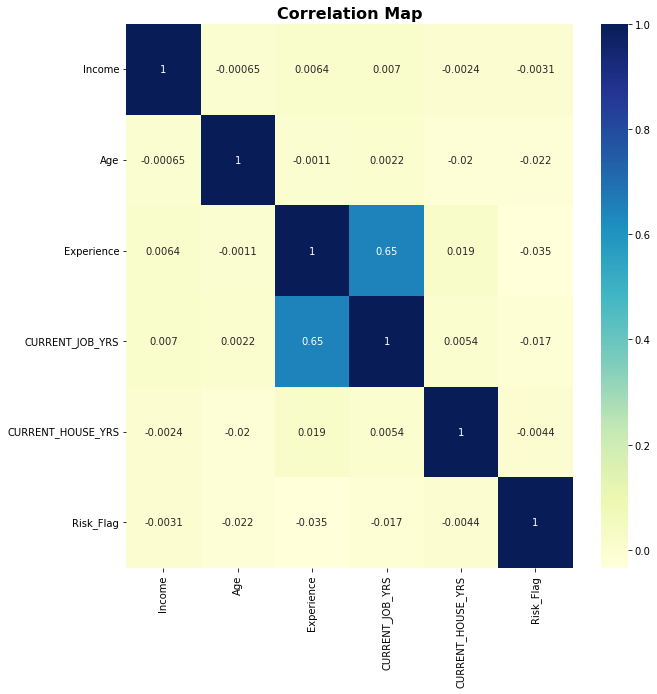

In [61]:
import seaborn as sns
loan_pred.corr()
plt.figure(figsize=(10,10))
sns.heatmap(loan_pred.corr(),cmap='YlGnBu', annot = True)
plt.title('Correlation Map', fontweight='bold', fontsize=16)

## considering which column could be converted from categorical to numerical 

In [23]:
loan_pred['Profession'].value_counts()

Physician                     5957
Statistician                  5806
Web_designer                  5397
Psychologist                  5390
Computer_hardware_engineer    5372
Drafter                       5359
Magistrate                    5357
Fashion_Designer              5304
Air_traffic_controller        5281
Comedian                      5259
Industrial_Engineer           5250
Mechanical_engineer           5217
Chemical_engineer             5205
Technical_writer              5195
Hotel_Manager                 5178
Financial_Analyst             5167
Graphic_Designer              5166
Flight_attendant              5128
Biomedical_Engineer           5127
Secretary                     5061
Software_Developer            5053
Petroleum_Engineer            5041
Police_officer                5035
Computer_operator             4990
Politician                    4944
Microbiologist                4881
Technician                    4864
Artist                        4861
Lawyer              

In [26]:
print(np.unique(loan_pred['Married/Single']))# could be convert to 0 and 1
print(loan_pred['Married/Single'].value_counts())


['married' 'single']
single     226272
married     25728
Name: Married/Single, dtype: int64


In [63]:
###Changing Married and Single to 1 and 0 respectively 
loan_pred['Married/Single'].replace(['single','married'],[0,1],inplace=True)
print(loan_pred['Married/Single'].value_counts())

0    226272
1     25728
Name: Married/Single, dtype: int64


In [28]:
#print(np.unique(loan_pred['House_Ownership']))# could be convert to 0 and 1 and 2
print(loan_pred['House_Ownership'].value_counts())


['norent_noown' 'owned' 'rented']
rented          231898
owned            12918
norent_noown      7184
Name: House_Ownership, dtype: int64


In [68]:
#Changing House_Ownership to 1 and 0; Yes = 1 & no =0
loan_pred['House_Ownership'].replace(['rented','owned','norent_noown'],[1,2,3], inplace=True)
print(loan_pred['House_Ownership'].value_counts())

1    231898
2     12918
3      7184
Name: House_Ownership, dtype: int64


In [29]:
np.unique(loan_pred['Car_Ownership']) # could be convert to 0 and 1
print(loan_pred['Car_Ownership'].value_counts())


no     176000
yes     76000
Name: Car_Ownership, dtype: int64


In [70]:
#Changing Car_Ownership to 1 and 0; Yes = 1 & no =0
loan_pred['Car_Ownership'].replace(['no','yes'],[0,1], inplace=True)
print(loan_pred['Car_Ownership'].value_counts())

0    176000
1     76000
Name: Car_Ownership, dtype: int64


In [30]:
np.unique(loan_pred['CITY']) # converting to number doesn't look helping 
loan_pred['CITY'].value_counts()

Vijayanagaram       1259
Bhopal              1208
Bulandshahr         1185
Saharsa[29]         1180
Vijayawada          1172
                    ... 
Ujjain               486
Warangal[11][12]     459
Bettiah[33]          457
Katni                448
Karaikudi            431
Name: CITY, Length: 317, dtype: int64

In [31]:
np.unique(loan_pred['STATE'])# converting to number doesn't look helping 
loan_pred['STATE'].value_counts()

Uttar_Pradesh        28400
Maharashtra          25562
Andhra_Pradesh       25297
West_Bengal          23483
Bihar                19780
Tamil_Nadu           16537
Madhya_Pradesh       14122
Karnataka            11855
Gujarat              11408
Rajasthan             9174
Jharkhand             8965
Haryana               7890
Telangana             7524
Assam                 7062
Kerala                5805
Delhi                 5490
Punjab                4720
Odisha                4658
Chhattisgarh          3834
Uttarakhand           1874
Jammu_and_Kashmir     1780
Puducherry            1433
Mizoram                849
Manipur                849
Himachal_Pradesh       833
Tripura                809
Uttar_Pradesh[5]       743
Chandigarh             656
Sikkim                 608
Name: STATE, dtype: int64

In [17]:
np.unique(loan_pred['CURRENT_JOB_YRS']) 

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])

## VISUALIZING DATA

<AxesSubplot:>

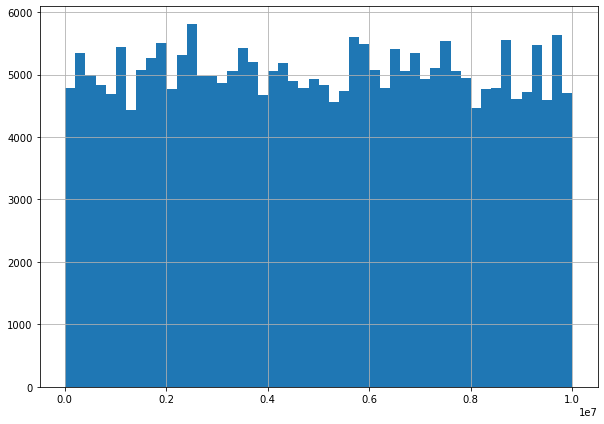

In [40]:
loan_pred['Income'].hist(bins=50, figsize=(10,7))

<AxesSubplot:>

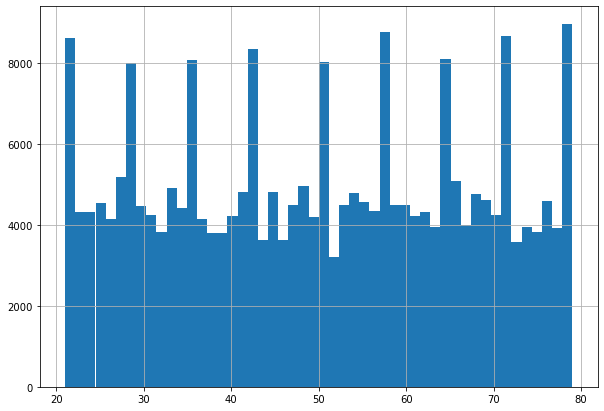

In [42]:
loan_pred['Age'].hist(bins=50, figsize=(10,7))

<AxesSubplot:>

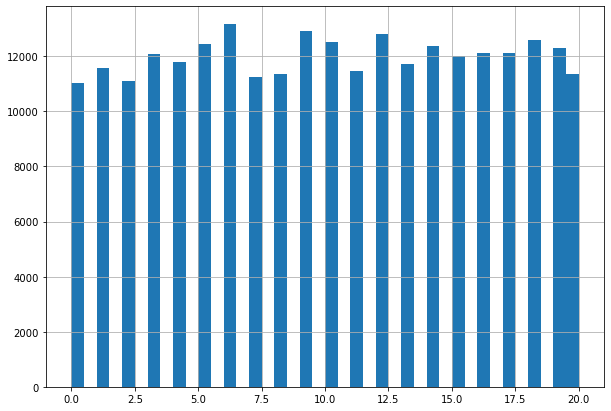

In [44]:
loan_pred['Experience'].hist(bins=40, figsize=(10,7))

<AxesSubplot:>

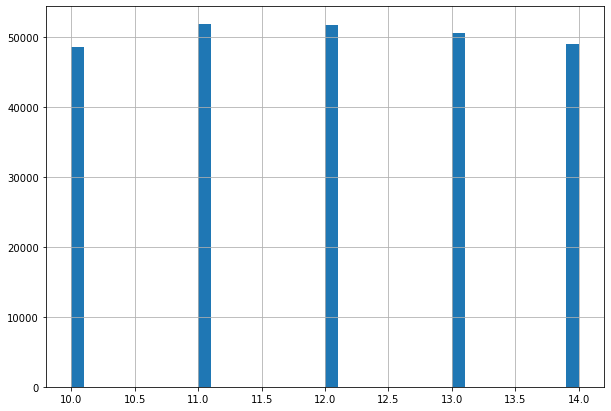

In [45]:
loan_pred['CURRENT_HOUSE_YRS'].hist(bins=40, figsize=(10,7))

<AxesSubplot:>

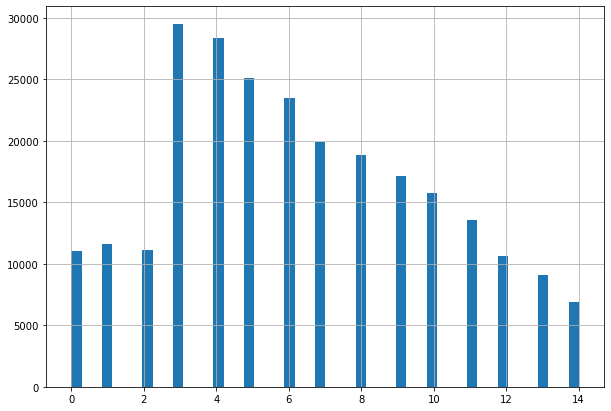

In [47]:
loan_pred['CURRENT_JOB_YRS'].hist(bins=50, figsize=(10,7))

<AxesSubplot:xlabel='CURRENT_HOUSE_YRS', ylabel='count'>

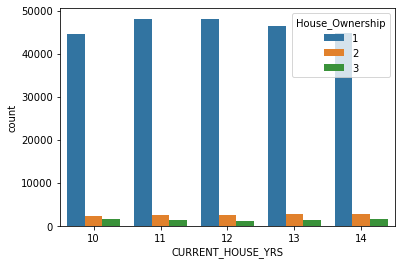

In [72]:
sns.countplot(x='CURRENT_HOUSE_YRS', data=loan_pred, hue='House_Ownership')
# 'rented','owned','norent_noown'],[1,2,3]

<AxesSubplot:xlabel='Married/Single', ylabel='count'>

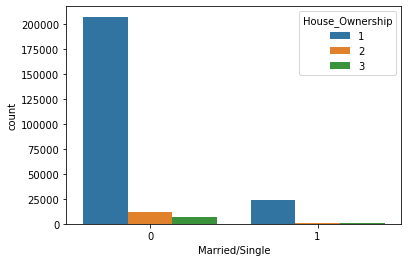

In [73]:
sns.countplot(x='Married/Single', data= loan_pred, hue='House_Ownership')

In [83]:
print(min(loan_pred["Income"]), max(loan_pred['Income']))
print(loan_pred.loc[loan_pred['Income']==10310 ])

    

10310 9999938
        Income  Age  Experience  Married/Single  House_Ownership  \
256      10310   70          20               0                1   
5624     10310   70          20               0                1   
16414    10310   70          20               0                1   
21778    10310   70          20               0                1   
27151    10310   70          20               0                1   
32567    10310   70          20               0                1   
48759    10310   70          20               0                1   
54185    10310   70          20               0                1   
59595    10310   70          20               0                1   
65018    10310   70          20               0                1   
70427    10310   70          20               0                1   
75837    10310   70          20               0                1   
81247    10310   70          20               0                1   
86665    10310   70          20   

In [84]:
print((loan_pred.loc[loan_pred['Income']==10310 ]).value_counts())

Income  Age  Experience  Married/Single  House_Ownership  Car_Ownership  Profession  CITY       STATE        CURRENT_JOB_YRS  CURRENT_HOUSE_YRS  Risk_Flag
10310   70   20          0               1                1              Engineer    Baranagar  West_Bengal  7                14                 0            37
dtype: int64


In [85]:
### above outcome seems not be reliable. how it could possible 37 persons have exactly the same attributes 
### it is recommended to remove all, but one 

In [94]:
attributes=['Income','Age','Experience','Married/Single','House_Ownership','Car_Ownership','Profession','CITY','STATE','CURRENT_JOB_YRS','CURRENT_HOUSE_YRS','Risk_Flag' ]
loan_pred.drop_duplicates(subset=attributes, inplace=True)

In [95]:
loan_pred.shape

(43190, 13)

In [82]:
print(loan_pred.loc[loan_pred['Income']==9999938])

         Income  Age  Experience  Married/Single  House_Ownership  \
229019  9999938   34          19               0                1   

        Car_Ownership      Profession       CITY    STATE  CURRENT_JOB_YRS  \
229019              1  Police_officer  Panchkula  Haryana                6   

        CURRENT_HOUSE_YRS  Risk_Flag  
229019                 13          0  
